In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"/content/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# print all column name
data.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [5]:
# check for null
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
# getting the reccord where verified_reviews is null
data[data["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
# drop the null record from data
data.dropna(inplace=True)

In [8]:
data.shape

(3149, 5)

In [9]:
data.duplicated().sum()

715

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(2434, 5)

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
data["Length"] = data["verified_reviews"].apply(len)

In [14]:
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [15]:
# checking random data from dataframe
data.iloc[20]["verified_reviews"]

'Love the Echo and how good the music sounds playing off it. Alexa understands most commands but it is difficult at times for her to find specific playlists or songs on Spotify. She is good with Amazon Music but is lacking in other major programs.'

In [16]:
print(f"length of reviews : {len(data.iloc[20]['verified_reviews'])}")

length of reviews : 246


In [17]:
# getting the reccord that has  0 feed back
df = data[data["feedback"]==0]
df.head()

,rating,date,variation,verified_reviews,feedback,Length
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0,165
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0,89
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [18]:
df.feedback.value_counts()

feedback
0    220
Name: count, dtype: int64

In [19]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
dtype: object

In [20]:
data["date"] = pd.to_datetime(data["date"])

<ipython-input-20-b3c7bc360fa1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(data["date"])


In [21]:
data.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
Length                       int64
dtype: object

In [22]:
df1=data["rating"].value_counts()
df1.head()

rating
5    1756
4     345
1     141
3     113
2      79
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns




Text(0, 0.5, 'Count')

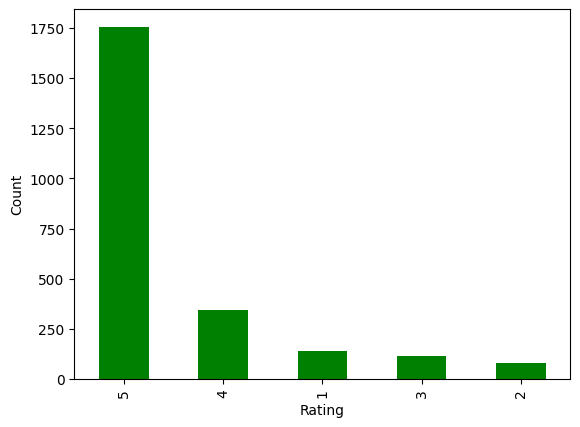

In [24]:
# plot bar graph
df1.plot.bar(color="green")
plt.xlabel("Rating")
plt.ylabel("Count")


In [25]:
# use of group by
df2=data.groupby("rating")["rating"].count()
df2.head()

rating
1     141
2      79
3     113
4     345
5    1756
Name: rating, dtype: int64

In [26]:
round((df2/data.shape[0])*100,2)

rating
1     5.79
2     3.25
3     4.64
4    14.17
5    72.14
Name: rating, dtype: float64

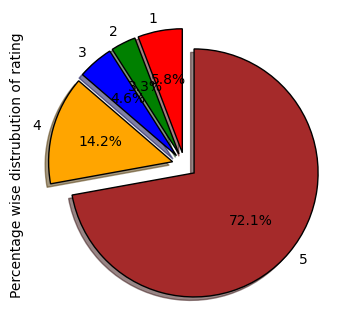

In [27]:
fig = plt.figure(figsize=(4,7))

colors = ('red', 'green', 'blue','orange','brown')

wp = {'linewidth':1, "edgecolor":'black'}

tags = round((df2/data.shape[0])*100,2)
explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [28]:
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,2018-07-31,Charcoal Fabric,Music,1,5


In [29]:
review1= data[data["feedback"]==1].iloc[0:2]["verified_reviews"]
print(review1)

0    Love my Echo!
1        Loved it!
Name: verified_reviews, dtype: object


so,

*   feedback 1 == +ve reviews
*   feedback 0  == -ve reviews


    

Text(0.5, 1.0, 'Feedback count')

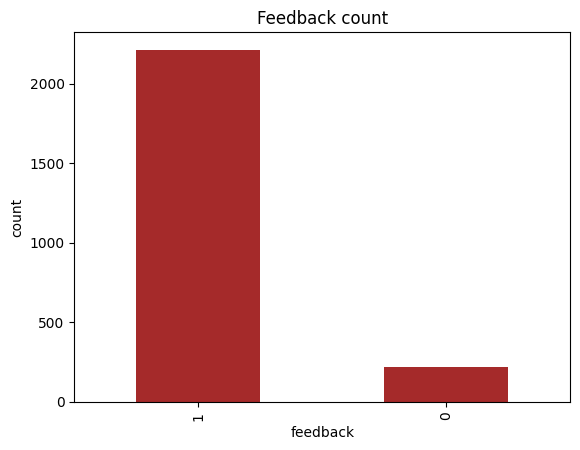

In [30]:
data["feedback"].value_counts().plot.bar(color="brown")
plt.xlabel("feedback")
plt.ylabel("count")
plt.title("Feedback count")


In [31]:
round((data["feedback"].value_counts())/data.shape[0]*100,2)

feedback
1    90.96
0     9.04
Name: count, dtype: float64

<Axes: ylabel='Percentage wise distrubution of feedback'>

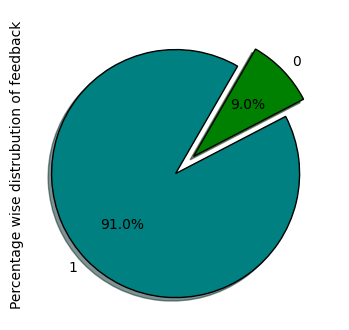

In [32]:
fig = plt.figure(figsize=(4,7))
colors = ('teal', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=60, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [33]:
# find the ratings given by customers when their is -ve feedback
data[data["feedback"]==0]["rating"].value_counts()


rating
1    141
2     79
Name: count, dtype: int64

When the customer has given rating 1 and 2 that is considerd as a negative feedback

In [34]:
# Find the ratings giveb by customers when their is a +ve feedback
data[data["feedback"]==1]["rating"].value_counts()

rating
5    1756
4     345
3     113
Name: count, dtype: int64

When customer has given rating as 3,4 & 5 that is considerd as +ve feedback

In [35]:
data.head(2)

,rating,date,variation,verified_reviews,feedback,Length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9


In [36]:
data["variation"].value_counts()

variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            90
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64

<Axes: xlabel='variation'>

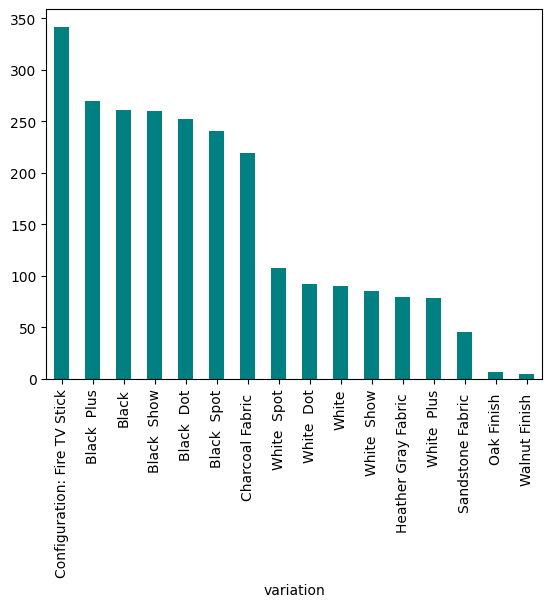

In [37]:
data["variation"].value_counts().plot.bar(color="teal")

In [38]:
print(f"Variation value count - percentage distribution: {round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: variation
Configuration: Fire TV Stick    14.05
Black  Plus                     11.09
Black                           10.72
Black  Show                     10.68
Black  Dot                      10.35
Black  Spot                      9.90
Charcoal Fabric                  9.00
White  Spot                      4.44
White  Dot                       3.78
White                            3.70
White  Show                      3.49
Heather Gray Fabric              3.25
White  Plus                      3.20
Sandstone Fabric                 1.85
Oak Finish                       0.29
Walnut Finish                    0.21
Name: count, dtype: float64


In [39]:
# mean of rating on variation column
data.groupby("variation")["rating"].mean()

variation
Black                           4.233716
Black  Dot                      4.452381
Black  Plus                     4.370370
Black  Show                     4.480769
Black  Spot                     4.311203
Charcoal Fabric                 4.735160
Configuration: Fire TV Stick    4.590643
Heather Gray Fabric             4.696203
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.800000
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.342593
Name: rating, dtype: float64

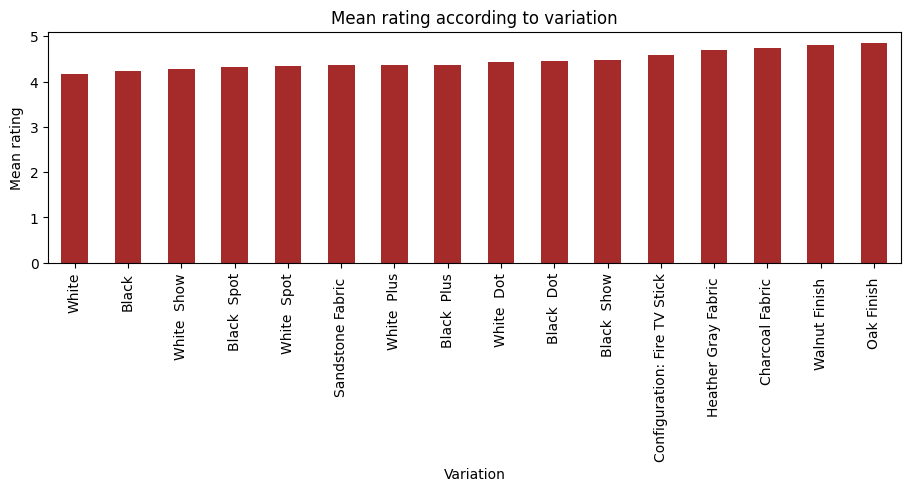

In [40]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 3))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [41]:
data["Length"].describe()

count    2434.000000
mean      138.589565
std       192.845688
min         1.000000
25%        31.000000
50%        77.500000
75%       172.000000
max      2853.000000
Name: Length, dtype: float64

<Axes: xlabel='Length', ylabel='Count'>

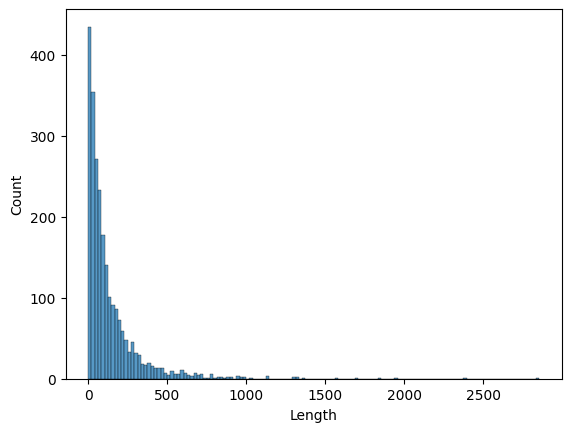

In [42]:
sns.histplot(data["Length"])

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

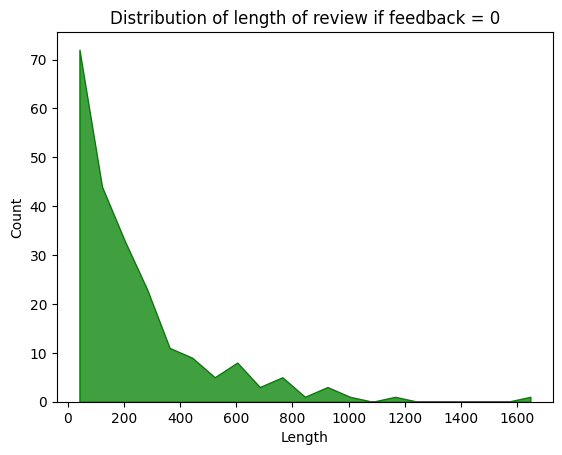

In [43]:
sns.histplot(data[data['feedback']==0]['Length'],color='green',element="poly").set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

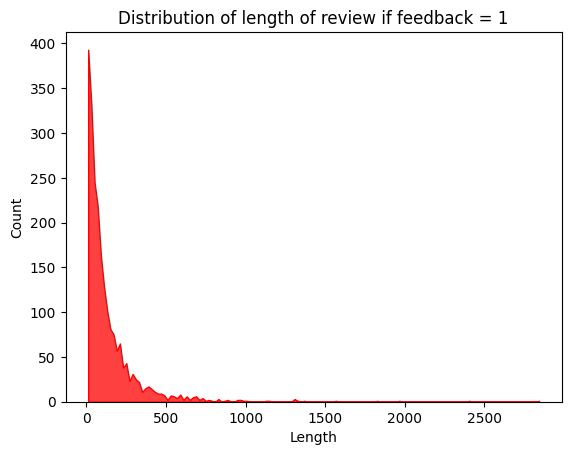

In [44]:
sns.histplot(data[data['feedback']==1]['Length'],color='red',element="poly").set(title='Distribution of length of review if feedback = 1')

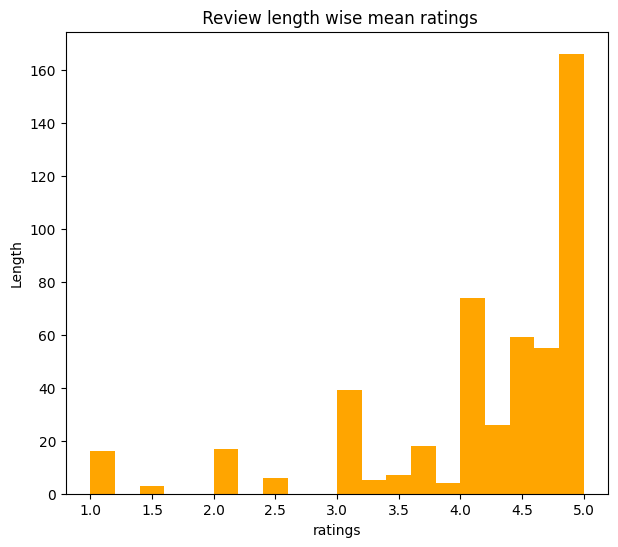

In [50]:
data.groupby('Length')['rating'].mean().plot.hist(color = 'Orange', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('Length')
plt.show()

In [52]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,Length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,2018-07-31,Charcoal Fabric,Music,1,5


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [55]:
words

<2434x3784 sparse matrix of type '<class 'numpy.int64'>'
	with 26478 stored elements in Compressed Sparse Row format>

Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I've purchased. I'm workin

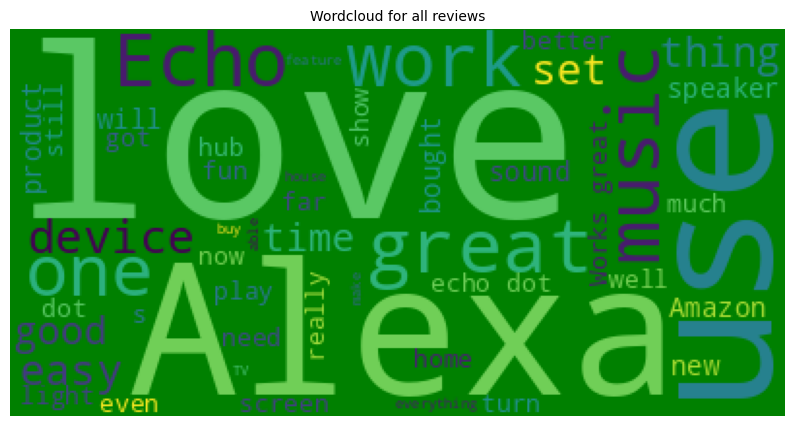

In [63]:
reviews = " ".join([review for review in data['verified_reviews']])
print(reviews)
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='green', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()


In [65]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,Length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,2018-07-31,Charcoal Fabric,Music,1,5


In [70]:
#list all reviews that conatin negative reviews
neg_reviews =" ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pov_reviews = " ".join([review for review in data[data["feedback"]==1]["verified_reviews"]])
pov_reviews = pov_reviews.lower().split()

# word that are only present in neg_reviews
unique_neg =" ".join([word for word in neg_reviews if word not in pov_reviews])

# word that are only present in pov_reviews
unique_pov =""
for word in pov_reviews:
    if word not in unique_neg:
      unique_pov +=word

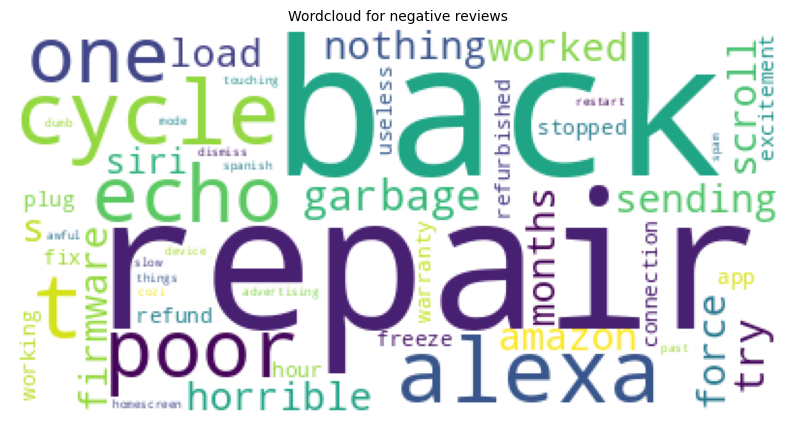

In [71]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

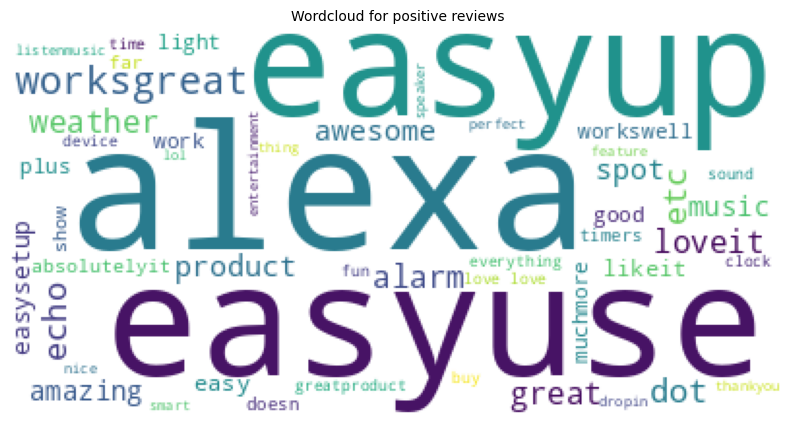

In [73]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_pov))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [75]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [76]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [79]:
#Saving the Count Vectorizer
import pickle
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [80]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2434, 2500)
y shape: (2434,)


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (1703, 2500)
y train: (1703,)
X test: (731, 2500)
y test: (731,)


In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [84]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [86]:
from sklearn.ensemble import RandomForestClassifier
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [87]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9935408103347034
Testing Accuracy : 0.9097127222982216


In [88]:
y_preds = model_rf.predict(X_test_scl)

In [91]:
#Con fusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

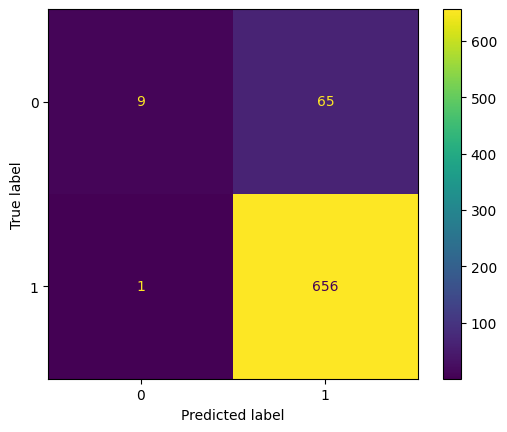

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9177880976952185
Standard Variance : 0.009144265394640222


In [95]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [98]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [99]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 300}


In [101]:
from sklearn.metrics import accuracy_score
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.41795519493775
Cross validation mean accuracy on test set : 91.43417472126137
Accuracy score for test set : 0.9097127222982216


In [104]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_scl, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9753376394597769
Testing Accuracy : 0.9165526675786594


In [107]:
y_preds = xgb.predict(X_test)

In [108]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 26  48]
 [ 11 646]]


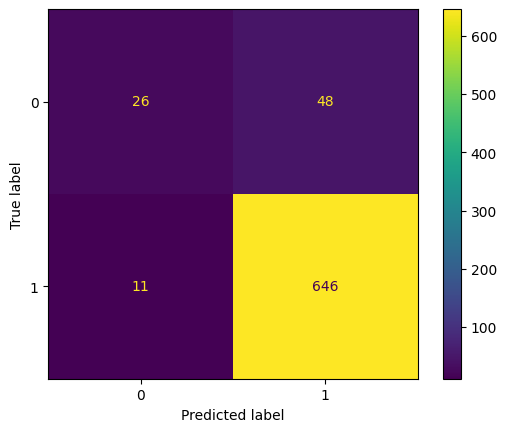

In [110]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
cm_display.plot()
plt.show()

In [113]:
#Saving the XGBoost classifier
pickle.dump(xgb, open('model_xgb.pkl', 'wb'))

In [114]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [115]:
print(dtc.score(X_train_scl, y_train))

0.9935408103347034


In [118]:
y_preds=dtc.predict(X_test)

In [120]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 30  44]
 [ 42 615]]


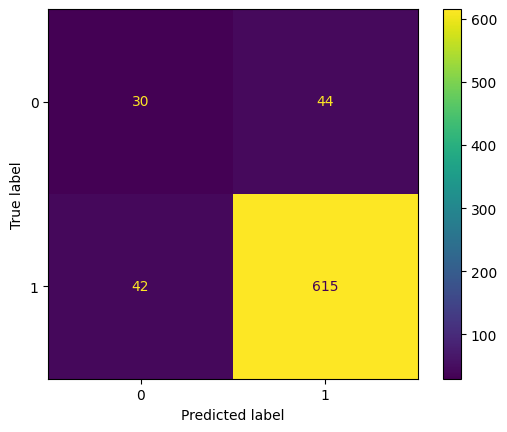

In [122]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
cm_display.plot()
plt.show()

In [123]:
pickle.dump(dtc, open('dtc.pkl', 'wb'))